# COVERAGE In-situ Subsetting Service (ISS) Examples

The following examples demonstrate how to access in-situ datasets via the COVERAGE In-situ Subsetting Service (ISS).

In [55]:
# Use pandas for manipulating data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [56]:
# Call the COVERAGE ISS API to download tag data as csv
url = 'https://oiip.jpl.nasa.gov/iss?project=taghost&source_id=5110061&format=csv&lat_max=-51.00&lat_min=-56.00&lon_max=47.15&lon_min=19.92&start_date=2016-03-07T00:00:00Z&end_date=2016-04-11T20:20:00Z&depth_min=20&depth_max=100'
df = pd.read_csv(url)
df.head() # show first few records

,measurement_date_time,lon,lat,depth,external_temperature_d,salinity_d
0,2016-03-07T13:00:00Z,45.9217,-52.3189,20.0,29.746,28.9
1,2016-03-07T13:00:00Z,45.9217,-52.3189,30.0,29.746,28.9
2,2016-03-07T13:00:00Z,45.9217,-52.3189,50.0,29.746,28.9
3,2016-03-07T13:00:00Z,45.9217,-52.3189,75.0,29.746,28.9
4,2016-03-07T13:00:00Z,45.9217,-52.3189,100.0,29.746,28.9


<AxesSubplot:xlabel='lon', ylabel='lat'>

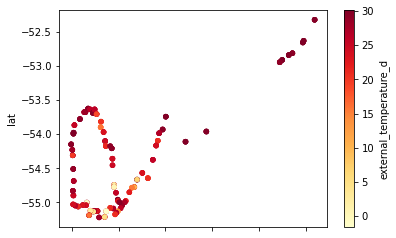

In [57]:
# Simple plot of data
df.plot(x='lon', y='lat', kind='scatter', c='external_temperature_d', colormap='YlOrRd')

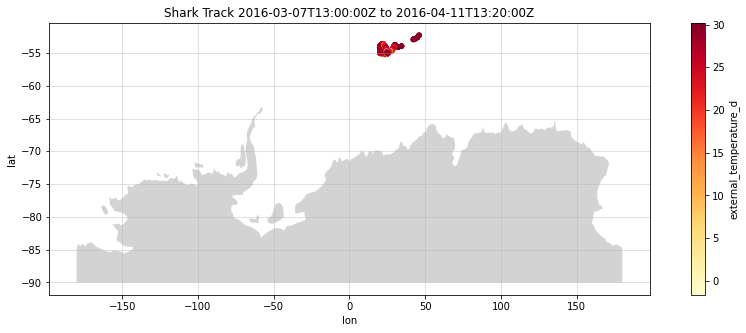

In [58]:
# Plot with a map 

# initialize an axis
fig, ax = plt.subplots(figsize=(15,5))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries[countries['continent'] == 'Antarctica'].plot(color='lightgrey', ax=ax)

# parse dates for plot's title
first = df['measurement_date_time'].min()
last = df["measurement_date_time"].max()

# plot points
df.plot(x='lon', y='lat', kind='scatter', 
        c='external_temperature_d', colormap='YlOrRd', 
        title=f'Shark Track {first} to {last}', 
        ax=ax)

# add grid
ax.grid(alpha=0.5)
plt.show()